<a href="https://colab.research.google.com/github/andryelarossignol/SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [16]:

results = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.01, 0.1, 1, 10, 100]
gamma_values = [0.01, 0.1, 1, 10]


for realization in range(30):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=realization
    )

    #
    for kernel in kernels:
        for C in C_values:
            for gamma in gamma_values:

                clf = SVC(kernel=kernel, C=C, gamma=gamma)
                clf.fit(X_train, y_train)


                y_pred = clf.predict(X_test)


                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
                f1 = f1_score(y_test, y_pred, average='weighted')
                cm = confusion_matrix(y_test, y_pred)


                results.append({
                    "realization": realization,
                    "kernel": kernel,
                    "C": C,
                    "gamma": gamma,
                    "accuracy": accuracy,
                    "recall": recall,
                    "precision": precision,
                    "f1": f1,
                    "confusion_matrix": cm
                })


In [22]:

df_results = pd.DataFrame(results)

print(df_results)


      realization   kernel       C  gamma  accuracy    recall  precision  \
0               0   linear    0.01   0.01  0.933333  0.933333   0.934524   
1               0   linear    0.01   0.10  0.933333  0.933333   0.934524   
2               0   linear    0.01   1.00  0.933333  0.933333   0.934524   
3               0   linear    0.01  10.00  0.933333  0.933333   0.934524   
4               0   linear    0.10   0.01  1.000000  1.000000   1.000000   
...           ...      ...     ...    ...       ...       ...        ...   
2395           29  sigmoid   10.00  10.00  0.333333  0.333333   0.111111   
2396           29  sigmoid  100.00   0.01  0.866667  0.866667   0.870287   
2397           29  sigmoid  100.00   0.10  0.066667  0.066667   0.032258   
2398           29  sigmoid  100.00   1.00  0.333333  0.333333   0.111111   
2399           29  sigmoid  100.00  10.00  0.333333  0.333333   0.111111   

            f1                      confusion_matrix  
0     0.933259  [[15, 0, 0], [0,

<ipython-input-18-e227a4e2dfa7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_by_kernel.index, y=accuracy_by_kernel.values, palette='viridis')


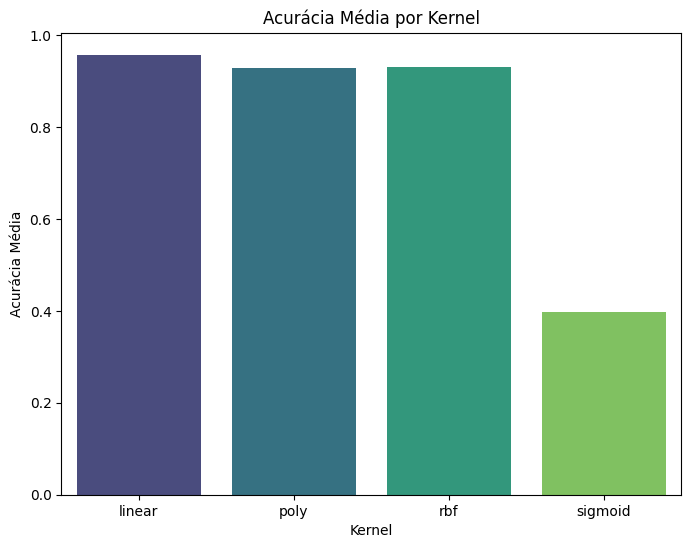

In [18]:

accuracy_by_kernel = df_results.groupby('kernel')['accuracy'].mean()


plt.figure(figsize=(8, 6))
sns.barplot(x=accuracy_by_kernel.index, y=accuracy_by_kernel.values, palette='viridis')
plt.title('Acurácia Média por Kernel')
plt.xlabel('Kernel')
plt.ylabel('Acurácia Média')
plt.show()


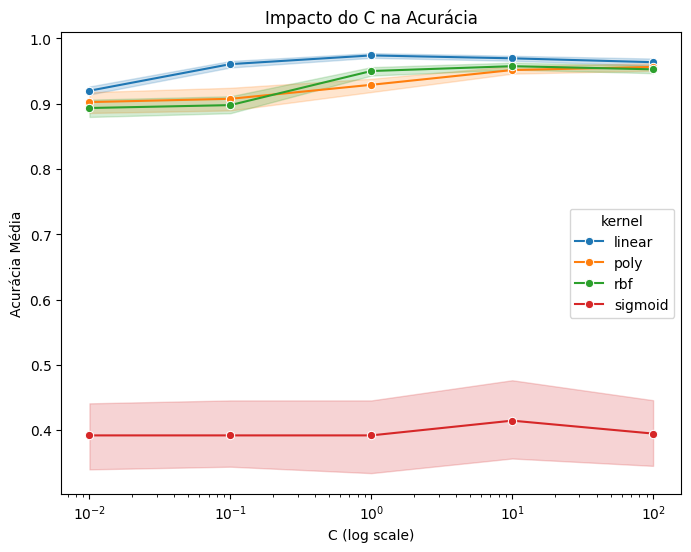

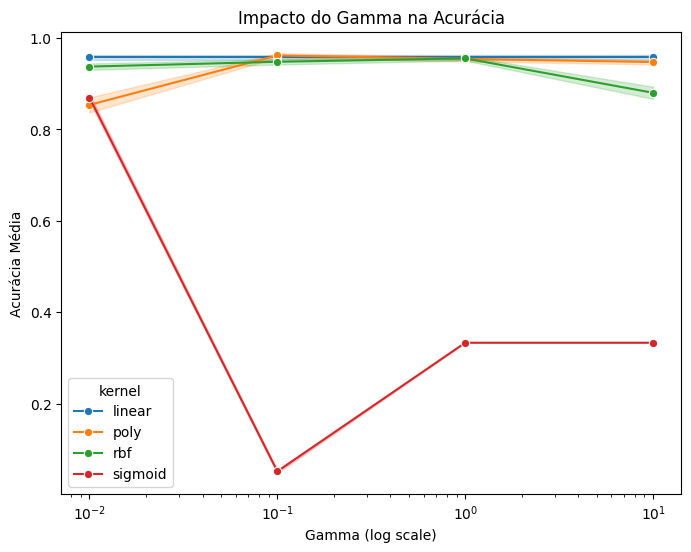

In [19]:

plt.figure(figsize=(8, 6))
sns.lineplot(data=df_results, x='C', y='accuracy', hue='kernel', marker='o')
plt.xscale('log')
plt.title('Impacto do C na Acurácia')
plt.xlabel('C (log scale)')
plt.ylabel('Acurácia Média')
plt.show()


plt.figure(figsize=(8, 6))
sns.lineplot(data=df_results, x='gamma', y='accuracy', hue='kernel', marker='o')
plt.xscale('log')
plt.title('Impacto do Gamma na Acurácia')
plt.xlabel('Gamma (log scale)')
plt.ylabel('Acurácia Média')
plt.show()


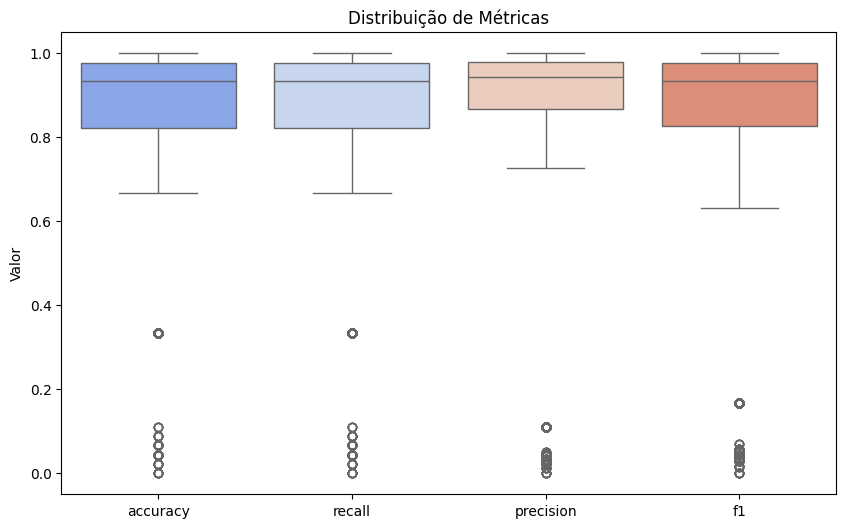

In [20]:

metrics = ['accuracy', 'recall', 'precision', 'f1']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_results[metrics], palette='coolwarm')
plt.title('Distribuição de Métricas')
plt.ylabel('Valor')
plt.show()


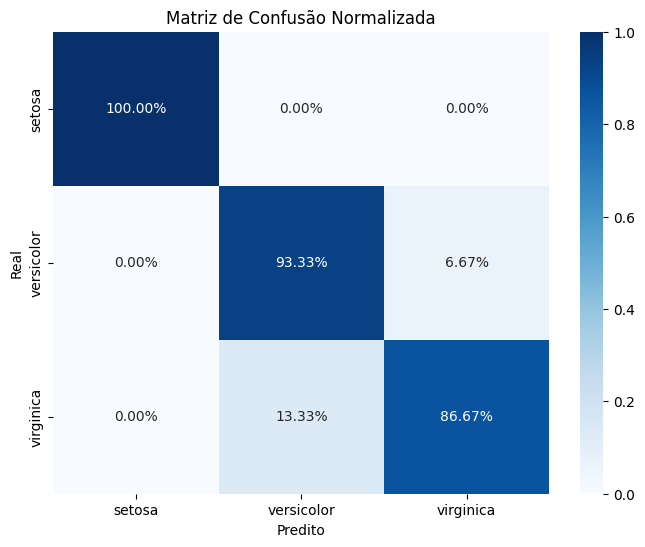

In [21]:

cm_example = df_results.iloc[0]['confusion_matrix']

cm_normalized = cm_example / cm_example.sum(axis=1, keepdims=True)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Matriz de Confusão Normalizada')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
